In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan_prediction.csv")
print(df.shape)
df.head()

(614, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


to check presence of null value

In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df.drop("Loan_ID",axis=1,inplace=True)

vizualize in object data

In [6]:
col=df.columns

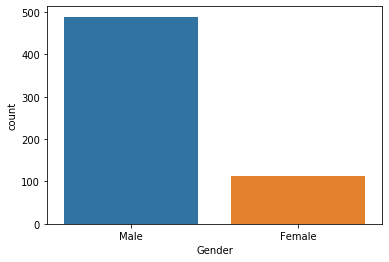

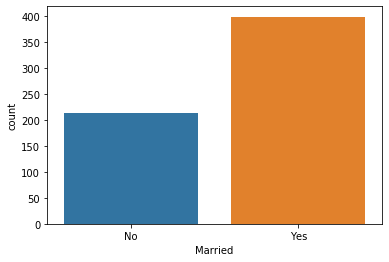

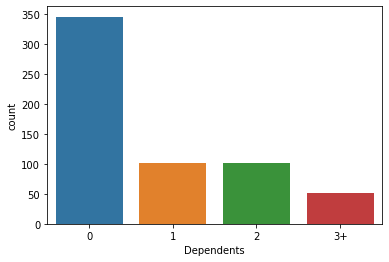

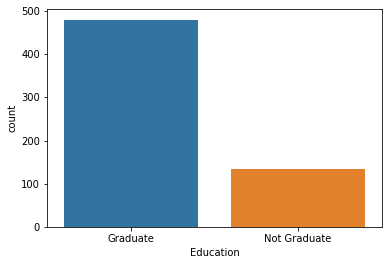

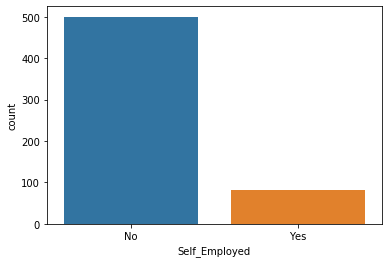

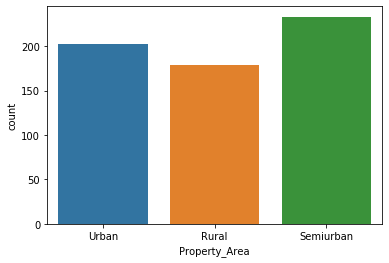

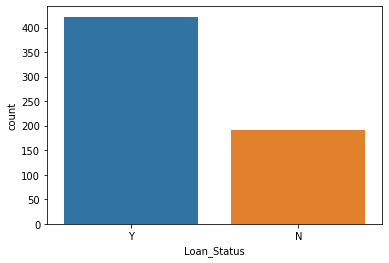

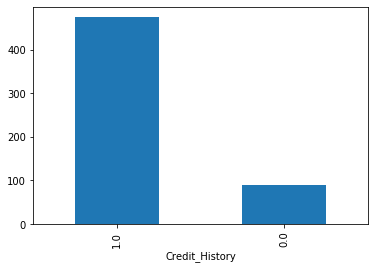

In [7]:
for i in df.loc[:,df.dtypes=="object"]:
    sns.countplot(df[i])
    plt.show()
df['Credit_History'].value_counts().plot.bar()
plt.xlabel("Credit_History")
plt.show()

to know relation btween object data and target valiable

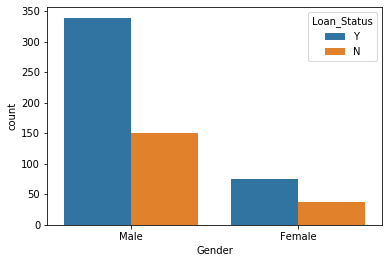

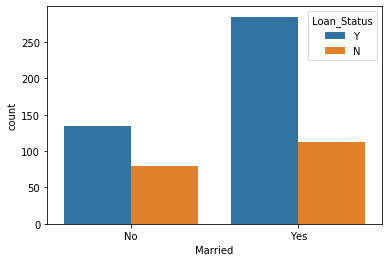

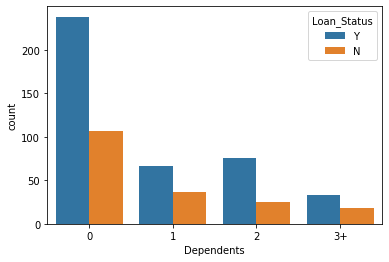

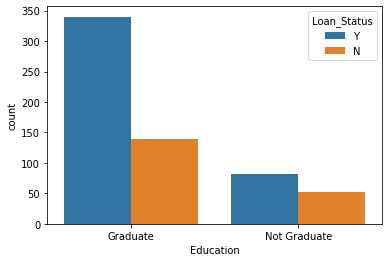

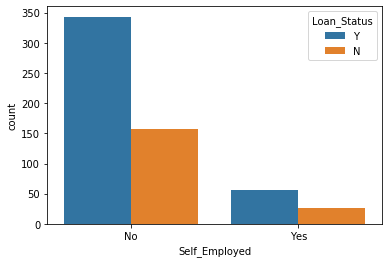

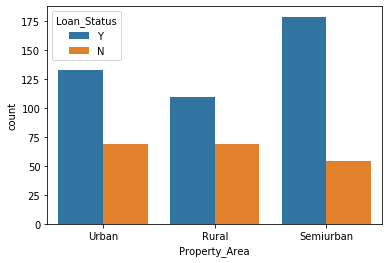

In [8]:
for i in df.loc[:,df.dtypes=="object"]:
    if i!="Loan_Status":
        sns.countplot(df[i],hue=df["Loan_Status"])
        plt.show()

vizualize in numaric variable

In [9]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

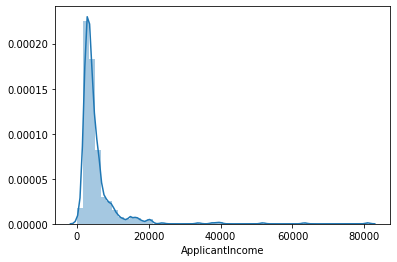

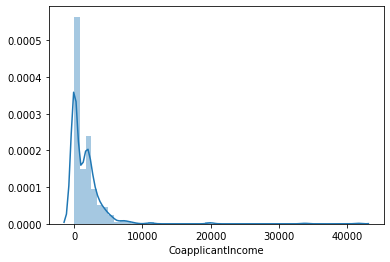

In [10]:
list1=['ApplicantIncome', 'CoapplicantIncome']
for i in list1:
    sns.distplot(df[i])
    plt.show()

to treat the null values

In [11]:
for i in df.loc[:,df.dtypes=="object"]:
    df[i].fillna(df[i].mode()[0],inplace=True)
for i in df.loc[:,df.dtypes=="float"]:
    df[i].fillna(df[i].median(),inplace=True)

graphical vizualization of null values

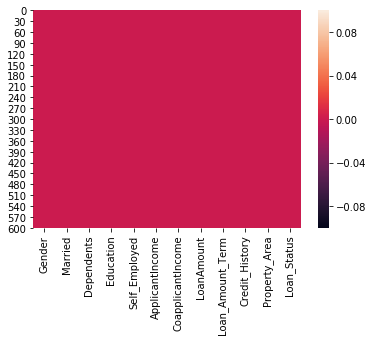

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
sns.heatmap(df.isnull())
plt.show()
df.isnull().sum()

To convert object data into int data

In [13]:
from sklearn.preprocessing import LabelEncoder
list2=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed','Credit_History', 'Property_Area', 'Loan_Status']
le=LabelEncoder()
for i in list2:
    df[i]=le.fit_transform(df[i])

In [14]:
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int32
Loan_Status            int32
dtype: object

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Property_Area        0.032112
Gender               0.017987
Dependents           0.010118
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.022549
LoanAmount          -0.033214
CoapplicantIncome   -0.059187
Education           -0.085884
Name: Loan_Status, dtype: float64

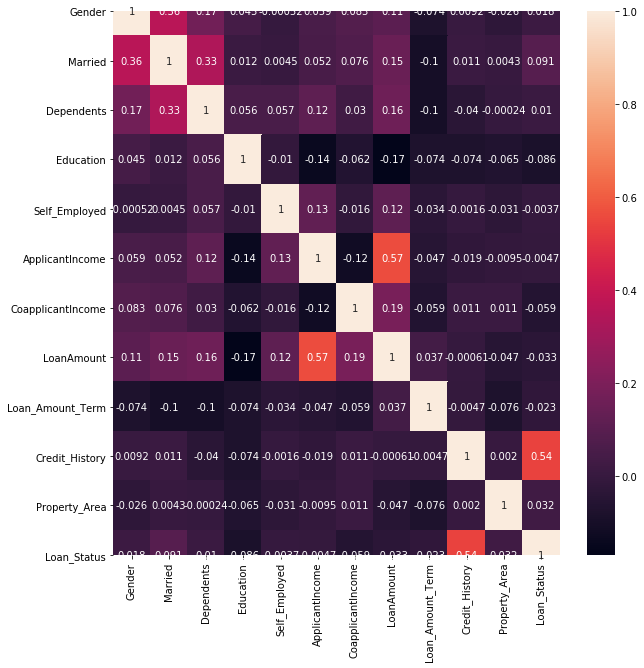

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show
df.corr()["Loan_Status"].sort_values(ascending=False)

it shows if Credit_History is high it leads to loan status Yes

To check presence of outliers

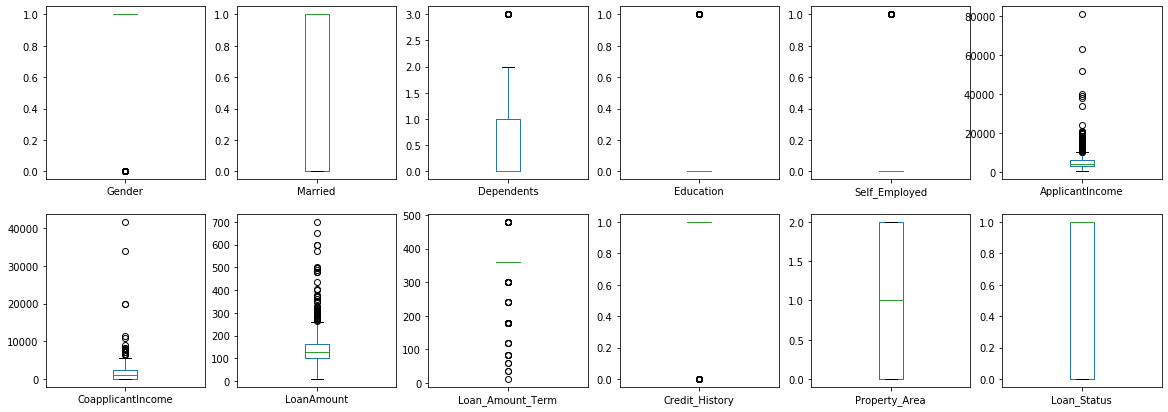

In [16]:
df.plot(kind="box",subplots=True,layout=(2,6),figsize=(20,7))
plt.show()

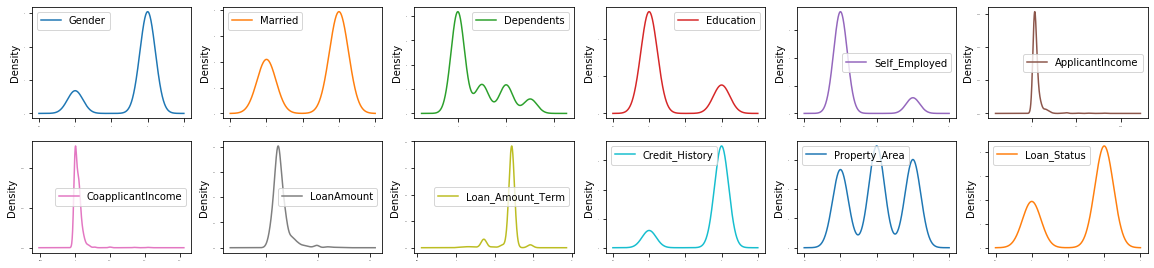

CoapplicantIncome    7.491531
ApplicantIncome      6.539513
LoanAmount           2.743053
Self_Employed        2.159796
Education            1.367622
Dependents           1.015551
Property_Area       -0.066196
Married             -0.644850
Loan_Status         -0.809998
Gender              -1.648795
Credit_History      -2.021971
Loan_Amount_Term    -2.402112
dtype: float64

In [17]:
df.plot(kind="density",subplots=True,layout=(3,6),sharex=False,fontsize=1,figsize=(20,7))
plt.show()
df.skew().sort_values(ascending=False)

In [18]:
for col in df.columns:
    if df.skew().loc[col]>.55:
        df[col]=np.sqrt(df[col])
df.skew().sort_values(ascending=False)

ApplicantIncome      2.967286
Self_Employed        2.159796
Education            1.367622
LoanAmount           1.342269
CoapplicantIncome    0.979561
Dependents           0.567810
Property_Area       -0.066196
Married             -0.644850
Loan_Status         -0.809998
Gender              -1.648795
Credit_History      -2.021971
Loan_Amount_Term    -2.402112
dtype: float64

In [20]:
from scipy.stats import zscore
z=abs(zscore(df))
df1=df[(z<3).all(axis=1)]
print("Before removal of outlier : ",df.shape)
print("After removal of outlier : ",df1.shape)

Before removal of outlier :  (614, 12)
After removal of outlier :  (580, 12)


seperate train and test data

In [21]:
x=df1.drop("Loan_Status",axis=1)
y=df1["Loan_Status"]
print(x.shape)
print(y.shape)

(580, 11)
(580,)


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score

In [23]:
macc=0
for i in range(100):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.33,random_state=i)
    model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
    for m in model:
        m.fit(xtrain,ytrain)
        pred=m.predict(xtest)
        acc=accuracy_score(ytest,pred)
        if acc>macc:
            macc=acc
            rand=i
            mod=m
print("accuracy ",macc," obtained for random_state ",rand,"and the model is ",mod)

accuracy  0.875  obtained for random_state  9 and the model is  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


to check presence of biase

In [24]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
for i in model:
    print(i,cross_val_score(i,x,y,cv=4).mean())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 0.8103448275862069
GaussianNB(priors=None, var_smoothing=1e-09) 0.8086206896551724
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 0.7
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.33,random_state=9)
model=[LogisticRegression(),GaussianNB(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
    m.fit(xtrain,ytrain)
    pred=m.predict(xtest)
    acc=accuracy_score(ytest,pred)
    print(acc," of ",m)

0.875  of  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.875  of  GaussianNB(priors=None, var_smoothing=1e-09)
0.7760416666666666  of  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.7135416666666666  of  SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-

when compare this above accuracy score of cross_validation

LogisticRegression is looks good

Hyper Parameter Tuneing

In [26]:
from sklearn.model_selection import GridSearchCV
para={'C':[1.0,2.0,3.0,4.0],"tol":[0.0001,0.0015,0.0025,0.0002]}
gv=GridSearchCV(LogisticRegression(),para,cv=4)
gv.fit(xtrain,ytrain)
gvpred=gv.predict(xtest)
accuracy_score(ytest,gvpred)

0.875

In [27]:
import joblib
joblib.dump(gv,"loan_pred")
v=joblib.load("loan_pred")

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0.0,0.0,76.478755,0.000000,11.313708,360.0,1,2,1
1,1,1,1.0,0.0,0.0,67.697858,38.832976,11.313708,360.0,1,0,0
2,1,1,0.0,0.0,1.0,54.772256,0.000000,8.124038,360.0,1,2,1
3,1,1,0.0,1.0,0.0,50.823223,48.559242,10.954451,360.0,1,2,1
4,1,0,0.0,0.0,0.0,77.459667,0.000000,11.874342,360.0,1,2,1


In [29]:
l=np.array([1,0,0,0,0,5800,0,128,360,1,2]).reshape(1,-1)

In [30]:
v.predict(l)

array([1])